In [2]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=18f37224d351b96838ee7accc06773ebff3289ab0e7a57795b1b73654248a005
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


# **Preprocessing, Feature Engineering, Feature Selection**

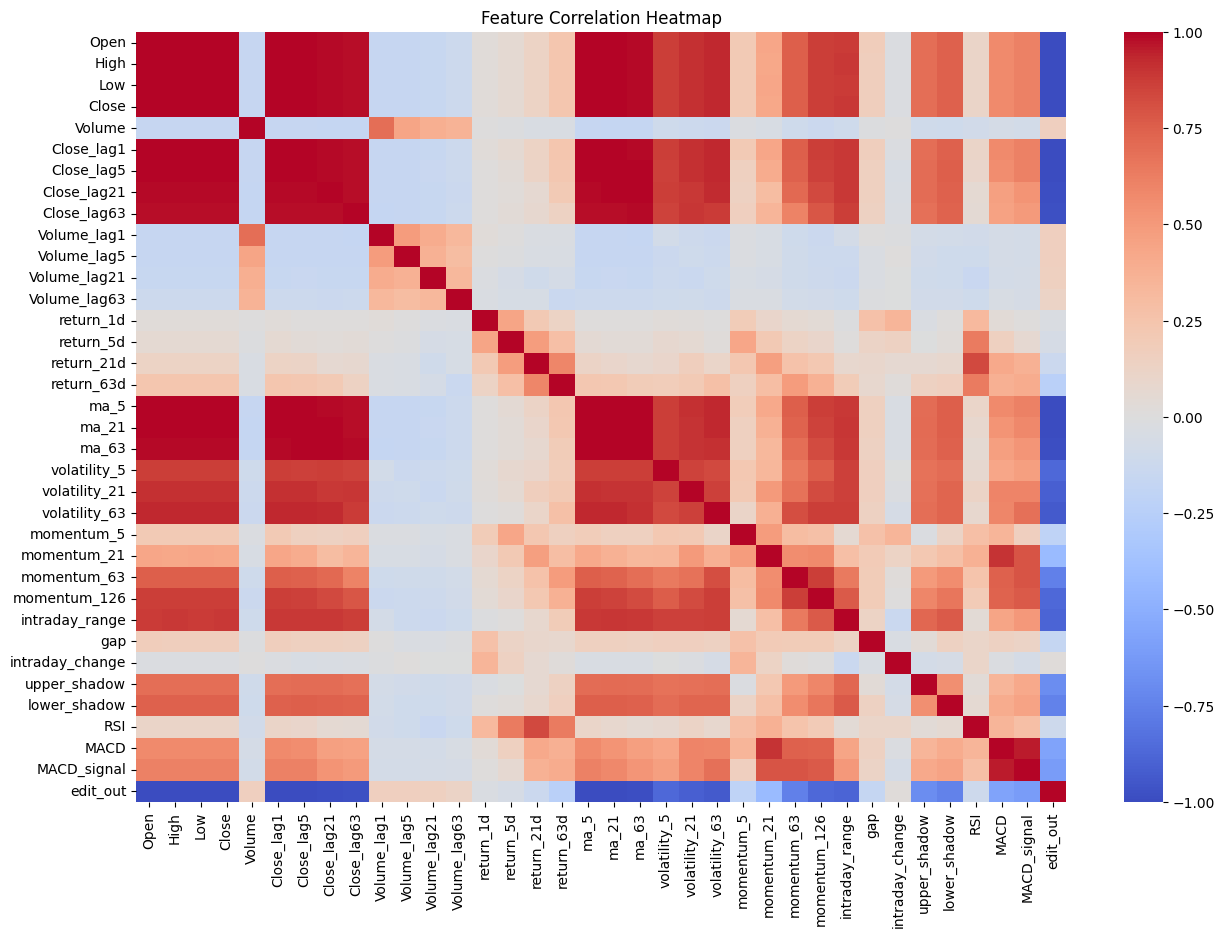

In [5]:
import pandas as pd

df = pd.read_csv("NVDA.csv", skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].set_index('Date')
df = df.loc['2008-01-01':'2024-12-31']

df['Close_lag1'] = df['Close'].shift(1)  # Yesterday’s closing price
df['Close_lag5'] = df['Close'].shift(5)  # Last week's closing price
df['Close_lag21'] = df['Close'].shift(21)  # Last month's closing price
df['Close_lag63'] = df['Close'].shift(63)  # Quarter's closing price

df['Volume_lag1'] = df['Volume'].shift(1)  # Volume from 1 days ago
df['Volume_lag5'] = df['Volume'].shift(5)  # Volume from 5 days ago
df['Volume_lag21'] = df['Volume'].shift(21)  # Volume from 21 days ago
df['Volume_lag63'] = df['Volume'].shift(63)  # Volume from 63 days ago

df['return_1d'] = df['Close_lag1'].pct_change()         # Daily return
df['return_5d'] = df['Close_lag1'].pct_change(5)        # 5-day return
df['return_21d'] = df['Close_lag1'].pct_change(21)      # 21-day return
df['return_63d'] = df['Close_lag1'].pct_change(63)      # 63-day return

df['ma_5'] = df['Close_lag1'].rolling(window=5).mean()
df['ma_21'] = df['Close_lag1'].rolling(window=21).mean()
df['ma_63'] = df['Close_lag1'].rolling(window=63).mean()

df['volatility_5'] = df['Close_lag1'].rolling(window=5).std()
df['volatility_21'] = df['Close_lag1'].rolling(window=21).std()
df['volatility_63'] = df['Close_lag1'].rolling(window=63).std()

df['momentum_5'] = df['Close_lag1'] - df['Close_lag1'].shift(5)
df['momentum_21'] = df['Close_lag1'] - df['Close_lag1'].shift(21)
df['momentum_63'] = df['Close_lag1'] - df['Close_lag1'].shift(63)
df['momentum_126'] = df['Close_lag1'] - df['Close_lag1'].shift(126)

df['intraday_range'] = df['High'].shift(1) - df['Low'].shift(1)
df['gap'] = df['Open'].shift(1) - df['Close_lag1'].shift(1)
df['intraday_change'] = df['Close'].shift(1) - df['Open'].shift(1)
df['upper_shadow'] = df['High'].shift(1) - df[['Open', 'Close']].shift(1).max(axis=1)
df['lower_shadow'] = df[['Open', 'Close']].shift(1).min(axis=1) - df['Low'].shift(1)
from ta.momentum import RSIIndicator
from ta.trend import MACD

df['RSI'] = RSIIndicator(close=df['Close_lag1'], window=14).rsi()
macd = MACD(close=df['Close_lag1'])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()

df['edit_out'] = df['Close'] * [-1]

import seaborn as sns
import matplotlib.pyplot as plt

corr = df.dropna().corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [3]:
import pandas as pd

df = pd.read_csv("AAPL.csv", skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].set_index('Date')
df = df.loc['2011-01-01':'2024-12-31']

df['Close_lag1'] = df['Close'].shift(1)  # Yesterday’s closing price
df['Close_lag5'] = df['Close'].shift(5)  # Last week's closing price
df['Close_lag21'] = df['Close'].shift(21)  # Last month's closing price
df['Close_lag63'] = df['Close'].shift(63)  # Quarter's closing price

df['Volume_lag1'] = df['Volume'].shift(1)  # Volume from 1 days ago
df['Volume_lag5'] = df['Volume'].shift(5)  # Volume from 5 days ago
df['Volume_lag21'] = df['Volume'].shift(21)  # Volume from 21 days ago
df['Volume_lag63'] = df['Volume'].shift(63)  # Volume from 63 days ago

df['return_1d'] = df['Close_lag1'].pct_change()         # Daily return
df['return_5d'] = df['Close_lag1'].pct_change(5)        # 5-day return
df['return_21d'] = df['Close_lag1'].pct_change(21)      # 21-day return
df['return_63d'] = df['Close_lag1'].pct_change(63)      # 63-day return

df['ma_5'] = df['Close_lag1'].rolling(window=5).mean()
df['ma_21'] = df['Close_lag1'].rolling(window=21).mean()
df['ma_63'] = df['Close_lag1'].rolling(window=63).mean()

df['volatility_5'] = df['Close_lag1'].rolling(window=5).std()
df['volatility_21'] = df['Close_lag1'].rolling(window=21).std()
df['volatility_63'] = df['Close_lag1'].rolling(window=63).std()

df['momentum_5'] = df['Close_lag1'] - df['Close_lag1'].shift(5)
df['momentum_21'] = df['Close_lag1'] - df['Close_lag1'].shift(21)
df['momentum_63'] = df['Close_lag1'] - df['Close_lag1'].shift(63)
df['momentum_126'] = df['Close_lag1'] - df['Close_lag1'].shift(126)

df['intraday_range'] = df['High'].shift(1) - df['Low'].shift(1)
df['gap'] = df['Open'].shift(1) - df['Close_lag1'].shift(1)
df['intraday_change'] = df['Close'].shift(1) - df['Open'].shift(1)
df['upper_shadow'] = df['High'].shift(1) - df[['Open', 'Close']].shift(1).max(axis=1)
df['lower_shadow'] = df[['Open', 'Close']].shift(1).min(axis=1) - df['Low'].shift(1)
from ta.momentum import RSIIndicator
from ta.trend import MACD

df['RSI'] = RSIIndicator(close=df['Close_lag1'], window=14).rsi()
macd = MACD(close=df['Close_lag1'])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()

df['edit_out'] = df['Close'] * [-1]



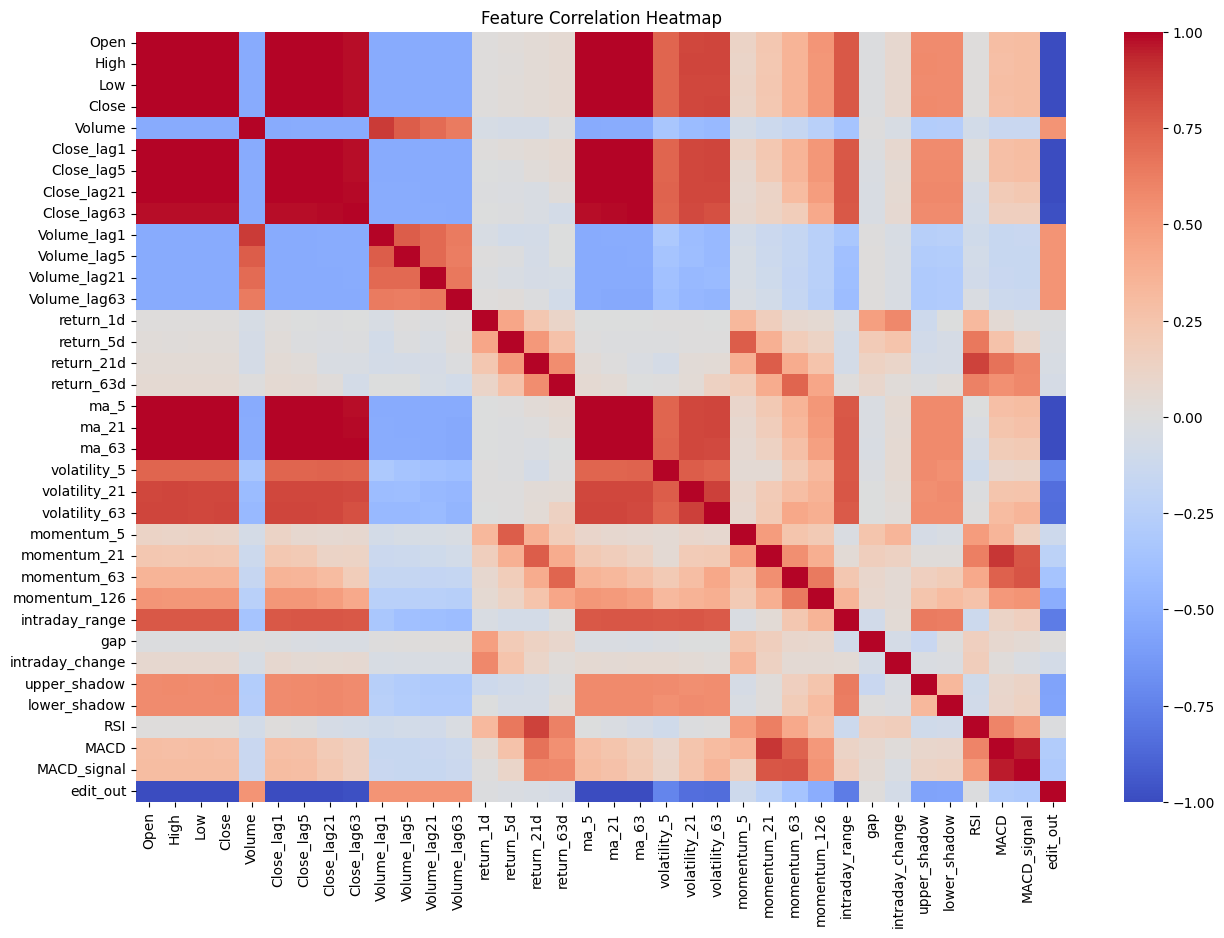

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.dropna().corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [10]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Close_lag1', 'Close_lag5',
       'Close_lag21', 'Close_lag63', 'Volume_lag1', 'Volume_lag5',
       'Volume_lag21', 'Volume_lag63', 'return_1d', 'return_5d', 'return_21d',
       'return_63d', 'ma_5', 'ma_21', 'ma_63', 'volatility_5', 'volatility_21',
       'volatility_63', 'momentum_5', 'momentum_21', 'momentum_63',
       'momentum_126', 'intraday_range', 'gap', 'intraday_change',
       'upper_shadow', 'lower_shadow', 'RSI', 'MACD', 'MACD_signal',
       'edit_out'],
      dtype='object')

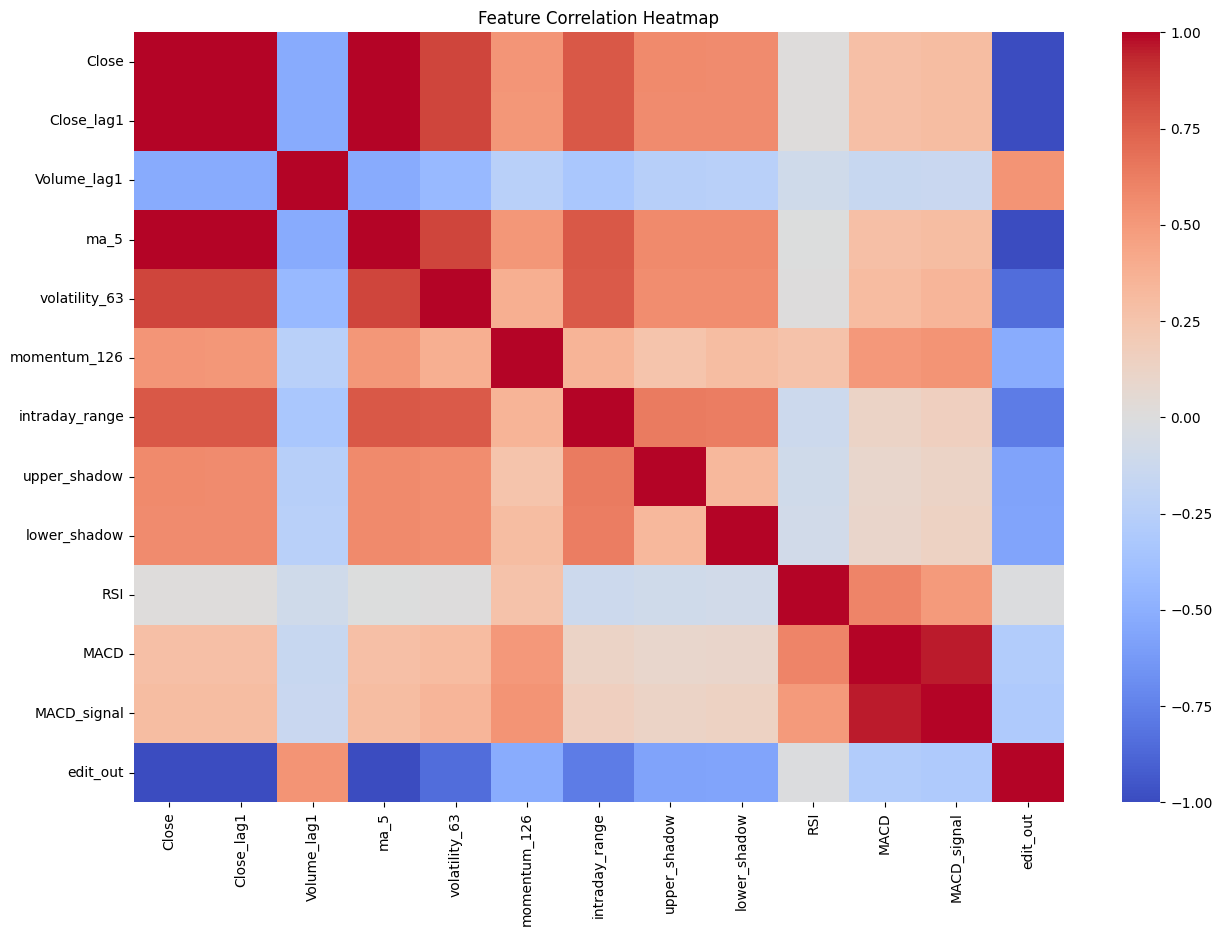

In [4]:
df = df.drop(columns=['return_1d', 'return_5d', 'return_21d', 'return_63d', 'gap', 'intraday_change']) \
       .drop(columns=['Volume', 'Volume_lag5', 'Volume_lag21', 'Volume_lag63']) \
       .drop(columns=['momentum_5', 'momentum_21', 'momentum_63', 'volatility_5', 'volatility_21']) \
       .drop(columns=['Close_lag5', 'Close_lag21', 'Close_lag63', 'ma_21', 'ma_63'])

df['momentum_126'] = df['Close'] - df['Close'].shift(126)
df = df.drop(columns=['edit_out'])
df['edit_out'] = df['Close'] * [-1]
df = df.drop(columns=['Open', 'High', 'Low'])
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.dropna().corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
df = df.drop(columns=['edit_out'])

In [5]:
df.head()

,Close,Close_lag1,Volume_lag1,ma_5,volatility_63,intraday_range,upper_shadow,lower_shadow,momentum_126
Date,,,,,,,,,
2008-01-02,5.863437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,5.866144,5.863437,1.079179e+09,NaN,NaN,0.232021,0.029793,0.068914,NaN
2008-01-04,5.418351,5.866144,8.420664e+08,NaN,NaN,0.141440,0.059585,0.067410,NaN
2008-01-07,5.345829,5.418351,1.455832e+09,NaN,NaN,0.424620,0.046645,0.034908,NaN
2008-01-08,5.153528,5.345829,2.072193e+09,NaN,NaN,0.402352,0.070720,0.222994,NaN


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0277
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0035
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0025
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0022
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0022
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0020
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0019
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0020
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0017
Epoch 13/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0018
Epoch 14/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019
Epoch 15/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0019
Epoc

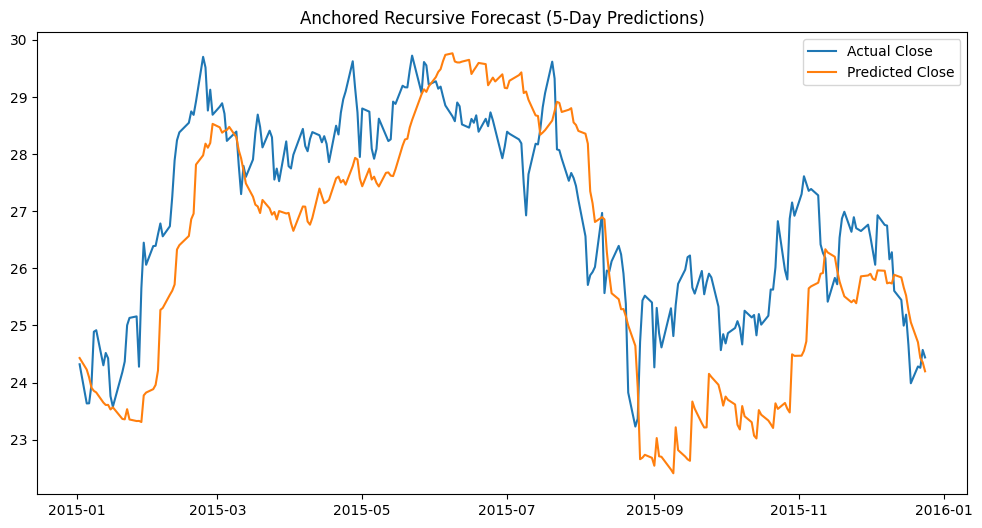

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Filter training and test data
train_df = df.loc['2012-01-01':'2014-12-31']
test_df = df.loc['2014-12-01':'2015-12-31']

features = df.columns.drop('Close')

# Step 2: Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[['Close']])

X_test = scaler_X.transform(test_df[features])
y_test = scaler_y.transform(test_df[['Close']])

# Step 3: Create sequences
def create_sequences(X, y, window=20, horizon=5):
    Xs, ys = [], []
    for i in range(len(X) - window - horizon + 1):
        Xs.append(X[i:i+window])
        ys.append(y[i+window:i+window+horizon].flatten())
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train, y_train)

# Step 4: Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dense(1)  # Predicting 5 future Close prices
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)

# Step 5: Recursive 5-day forecast using rolling predictions
window = 20
horizon = 5
X_test_full = X_test
dates = test_df.index

y_pred_scaled = []
y_pred_dates = []

start = 0
while start + window + horizon <= len(X_test_full):
    current_input = X_test_full[start:start+window].copy()  # Initial 20-day input

    pred_dates = dates[start + window : start + window + horizon]

    for i in range(horizon):
        date_i = pred_dates[i]
        if date_i < pd.Timestamp("2015-01-01") or date_i > pd.Timestamp("2015-12-31"):
            continue  # Skip if not in 2015
        X_input_seq = current_input[-window:].reshape(1, window, -1)

        # Predict next day (scaled Close)
        next_close_scaled = model.predict(X_input_seq, verbose=0)[0][0]
        y_pred_scaled.append([next_close_scaled])
        y_pred_dates.append(pred_dates[i])

        # Get next date's feature row from df (already computed, unscaled)
        real_next_row = df.loc[date_i, features].values.reshape(1, -1)

# Scale it
        real_next_row_scaled = scaler_X.transform(real_next_row)

# Replace Close_lag1 in scaled row with the predicted value
        real_next_row_scaled[0, features.get_loc('Close_lag1')] = next_close_scaled

# Append to current input
        current_input = np.vstack([current_input, real_next_row_scaled])


    # Snap to real values every 5 days
    start += horizon

# Convert to original scale
y_pred_scaled = np.array(y_pred_scaled).reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Match actual values
y_true = test_df.loc[y_pred_dates, 'Close']
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"RMSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")
print(f"MAPE: {mape}")
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_true.index, y_true.values, label='Actual Close')
plt.plot(y_true.index, y_pred.flatten(), label='Predicted Close')
plt.legend()
plt.title('Anchored Recursive Forecast (5-Day Predictions)')
plt.show()



Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0691
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0016
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.4931e-04
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4583e-04
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.3324e-04
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.8735e-04
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.5082e-04
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.2010e-04
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.6334e-04
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.7160e-04
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.2047e-04
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.9928e-04
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.4184e-04
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.9037e-04
Epoch 15/20
39/39 ━━━━━

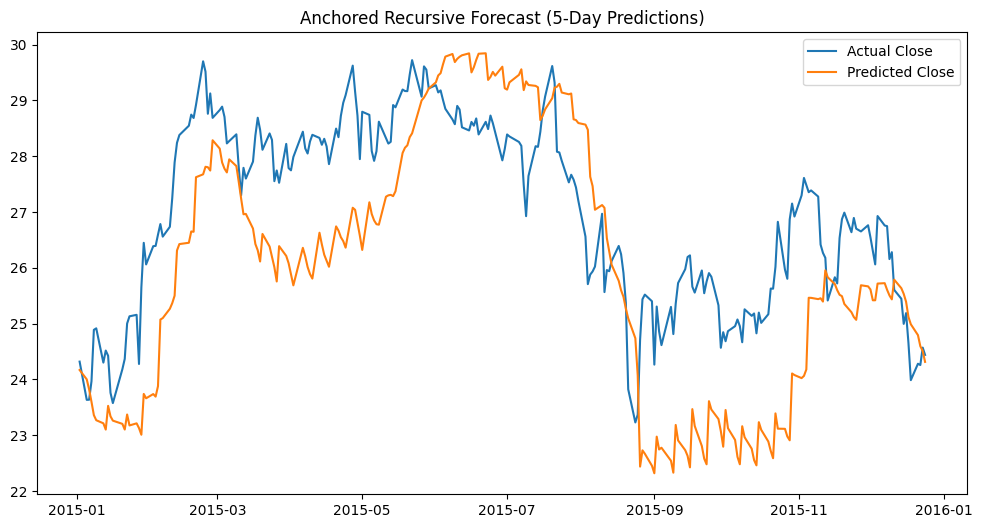

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Filter training and test data
train_df = df.loc['2010-01-01':'2014-12-31']
test_df = df.loc['2014-12-01':'2015-12-31']

features = df.columns.drop('Close')

# Step 2: Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[['Close']])

X_test = scaler_X.transform(test_df[features])
y_test = scaler_y.transform(test_df[['Close']])

# Step 3: Create sequences
def create_sequences(X, y, window=20, horizon=5):
    Xs, ys = [], []
    for i in range(len(X) - window - horizon + 1):
        Xs.append(X[i:i+window])
        ys.append(y[i+window:i+window+horizon].flatten())
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train, y_train)

# Step 4: Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dense(1)  # Predicting 5 future Close prices
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)

# Step 5: Recursive 5-day forecast using rolling predictions
window = 20
horizon = 5
X_test_full = X_test
dates = test_df.index

y_pred_scaled = []
y_pred_dates = []

start = 0
while start + window + horizon <= len(X_test_full):
    current_input = X_test_full[start:start+window].copy()  # Initial 20-day input

    pred_dates = dates[start + window : start + window + horizon]

    for i in range(horizon):
        date_i = pred_dates[i]
        if date_i < pd.Timestamp("2015-01-01") or date_i > pd.Timestamp("2015-12-31"):
            continue  # Skip if not in 2015
        X_input_seq = current_input[-window:].reshape(1, window, -1)

        # Predict next day (scaled Close)
        next_close_scaled = model.predict(X_input_seq, verbose=0)[0][0]
        y_pred_scaled.append([next_close_scaled])
        y_pred_dates.append(pred_dates[i])

        # Get next date's feature row from df (already computed, unscaled)
        real_next_row = df.loc[date_i, features].values.reshape(1, -1)

# Scale it
        real_next_row_scaled = scaler_X.transform(real_next_row)

# Replace Close_lag1 in scaled row with the predicted value
        real_next_row_scaled[0, features.get_loc('Close_lag1')] = next_close_scaled

# Append to current input
        current_input = np.vstack([current_input, real_next_row_scaled])


    # Snap to real values every 5 days
    start += horizon

# Convert to original scale
y_pred_scaled = np.array(y_pred_scaled).reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Match actual values
y_true = test_df.loc[y_pred_dates, 'Close']
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")
print(f"MAPE: {mape}")
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_true.index, y_true.values, label='Actual Close')
plt.plot(y_true.index, y_pred.flatten(), label='Predicted Close')
plt.legend()
plt.title('Anchored Recursive Forecast (5-Day Predictions)')
plt.show()



Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0533
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0013
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0010
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.7346e-04
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.1831e-04
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.1001e-04
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.4456e-04
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.2680e-04
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.5788e-04
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.6126e-04
Epoch 13/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.8205e-04
Epoch 14/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.0315e-04
Epoch 15/20
47/47 ━━━━━━━━━━━━━━━━━━

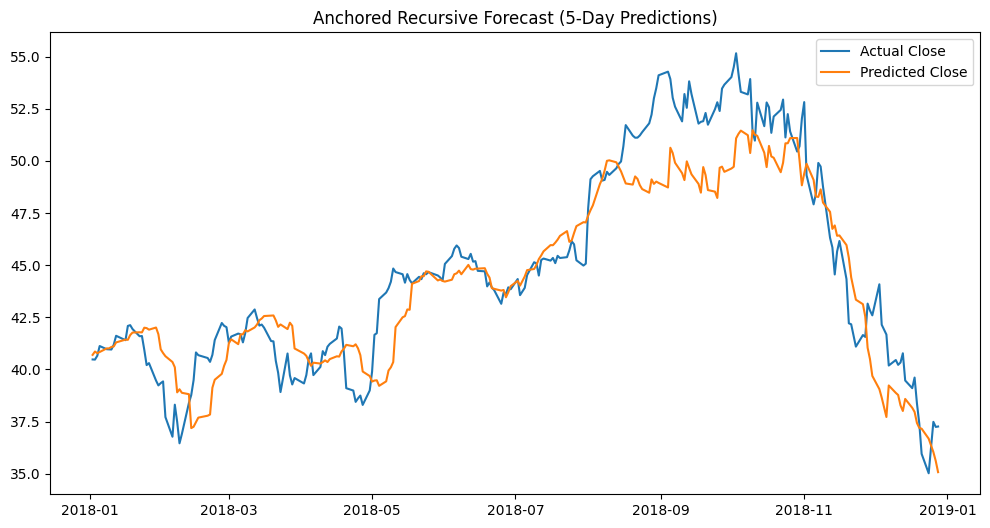

In [16]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Filter training and test data
train_df = df.loc['2012-01-01':'2017-12-31']
test_df = df.loc['2017-12-01':'2018-12-31']

features = df.columns.drop('Close')

# Step 2: Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[['Close']])

X_test = scaler_X.transform(test_df[features])
y_test = scaler_y.transform(test_df[['Close']])

# Step 3: Create sequences
def create_sequences(X, y, window=20, horizon=5):
    Xs, ys = [], []
    for i in range(len(X) - window - horizon + 1):
        Xs.append(X[i:i+window])
        ys.append(y[i+window:i+window+horizon].flatten())
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train, y_train)

# Step 4: Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dense(1)  # Predicting 5 future Close prices
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)

# Step 5: Recursive 5-day forecast using rolling predictions
window = 20
horizon = 5
X_test_full = X_test
dates = test_df.index

y_pred_scaled = []
y_pred_dates = []

start = 0
while start + window + horizon <= len(X_test_full):
    current_input = X_test_full[start:start+window].copy()  # Initial 20-day input

    pred_dates = dates[start + window : start + window + horizon]

    for i in range(horizon):
        date_i = pred_dates[i]
        if date_i < pd.Timestamp("2018-01-01") or date_i > pd.Timestamp("2018-12-31"):
            continue  # Skip if not in 2018
        X_input_seq = current_input[-window:].reshape(1, window, -1)

        # Predict next day (scaled Close)
        next_close_scaled = model.predict(X_input_seq, verbose=0)[0][0]
        y_pred_scaled.append([next_close_scaled])
        y_pred_dates.append(pred_dates[i])

        # Get next date's feature row from df (already computed, unscaled)
        real_next_row = df.loc[date_i, features].values.reshape(1, -1)

# Scale it
        real_next_row_scaled = scaler_X.transform(real_next_row)

# Replace Close_lag1 in scaled row with the predicted value
        real_next_row_scaled[0, features.get_loc('Close_lag1')] = next_close_scaled

# Append to current input
        current_input = np.vstack([current_input, real_next_row_scaled])


    # Snap to real values every 5 days
    start += horizon

# Convert to original scale
y_pred_scaled = np.array(y_pred_scaled).reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Match actual values
y_true = test_df.loc[y_pred_dates, 'Close']
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")
print(f"MAPE: {mape}")
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_true.index, y_true.values, label='Actual Close')
plt.plot(y_true.index, y_pred.flatten(), label='Predicted Close')
plt.legend()
plt.title('Anchored Recursive Forecast (5-Day Predictions)')
plt.show()

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0306
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0011
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0011
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0012
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 9.8278e-04
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 9.9861e-04
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 9.6891e-04
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 9.1218e-04
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0010
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 8.7646e-04
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 9.1998e-04
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 9.5469e-04
Epoch 13/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 9.6495e-04
Epoch 14/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 7.9562e-04
Epoch 15/20
47/47 ━━━━━━━━━━━━━━━━━

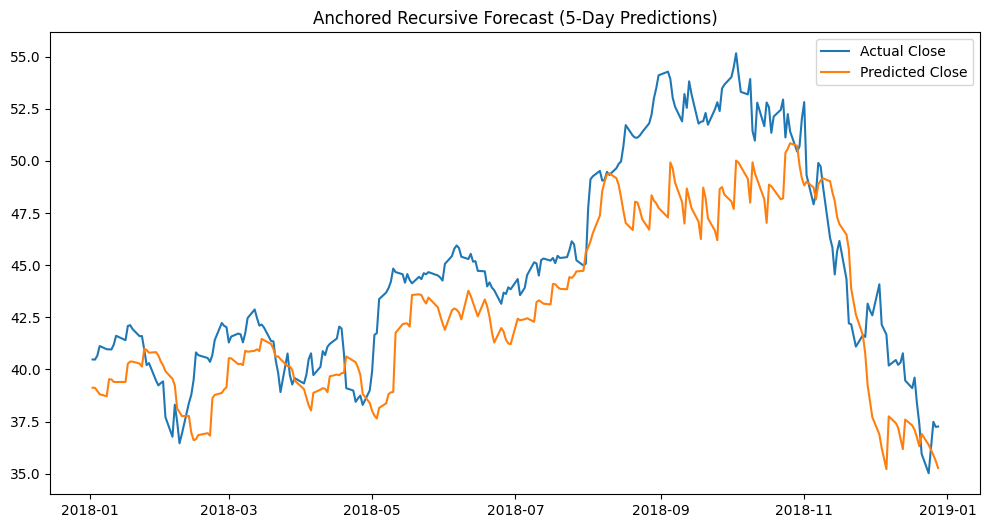

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Filter training and test data
train_df = df.loc['2012-01-01':'2017-12-31']
test_df = df.loc['2017-12-01':'2018-12-31']

features = df.columns.drop('Close')

# Step 2: Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[['Close']])

X_test = scaler_X.transform(test_df[features])
y_test = scaler_y.transform(test_df[['Close']])

# Step 3: Create sequences
def create_sequences(X, y, window=20, horizon=5):
    Xs, ys = [], []
    for i in range(len(X) - window - horizon + 1):
        Xs.append(X[i:i+window])
        ys.append(y[i+window:i+window+horizon].flatten())
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train, y_train)

window = 20
horizon = 5
# Step 4: Build the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(window, X_train_seq.shape[2])),
    LSTM(64),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)

# Step 5: Recursive 5-day forecast using rolling predictions
X_test_full = X_test
dates = test_df.index

y_pred_scaled = []
y_pred_dates = []

start = 0
while start + window + horizon <= len(X_test_full):
    current_input = X_test_full[start:start+window].copy()  # Initial 20-day input

    pred_dates = dates[start + window : start + window + horizon]

    for i in range(horizon):
        date_i = pred_dates[i]
        if date_i < pd.Timestamp("2018-01-01") or date_i > pd.Timestamp("2018-12-31"):
            continue  # Skip if not in 2018
        X_input_seq = current_input[-window:].reshape(1, window, -1)

        # Predict next day (scaled Close)
        next_close_scaled = model.predict(X_input_seq, verbose=0)[0][0]
        y_pred_scaled.append([next_close_scaled])
        y_pred_dates.append(pred_dates[i])

        # Get next date's feature row from df (already computed, unscaled)
        real_next_row = df.loc[date_i, features].values.reshape(1, -1)

# Scale it
        real_next_row_scaled = scaler_X.transform(real_next_row)

# Replace Close_lag1 in scaled row with the predicted value
        real_next_row_scaled[0, features.get_loc('Close_lag1')] = next_close_scaled

# Append to current input
        current_input = np.vstack([current_input, real_next_row_scaled])


    # Snap to real values every 5 days
    start += horizon

# Convert to original scale
y_pred_scaled = np.array(y_pred_scaled).reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Match actual values
y_true = test_df.loc[y_pred_dates, 'Close']
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")
print(f"MAPE: {mape}")
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_true.index, y_true.values, label='Actual Close')
plt.plot(y_true.index, y_pred.flatten(), label='Predicted Close')
plt.legend()
plt.title('Anchored Recursive Forecast (5-Day Predictions)')
plt.show()

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0362
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0013
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0012
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 9.7639e-04
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 9.9249e-04
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 8.8732e-04
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0010
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 8.8990e-04
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 8.6645e-04
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 9.3236e-04
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 7.7746e-04
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 7.4924e-04
Epoch 13/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 7.6047e-04
Epoch 14/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 7.3110e-04
Epoch 15/20
47/47 ━━━━━━━━━━━━━

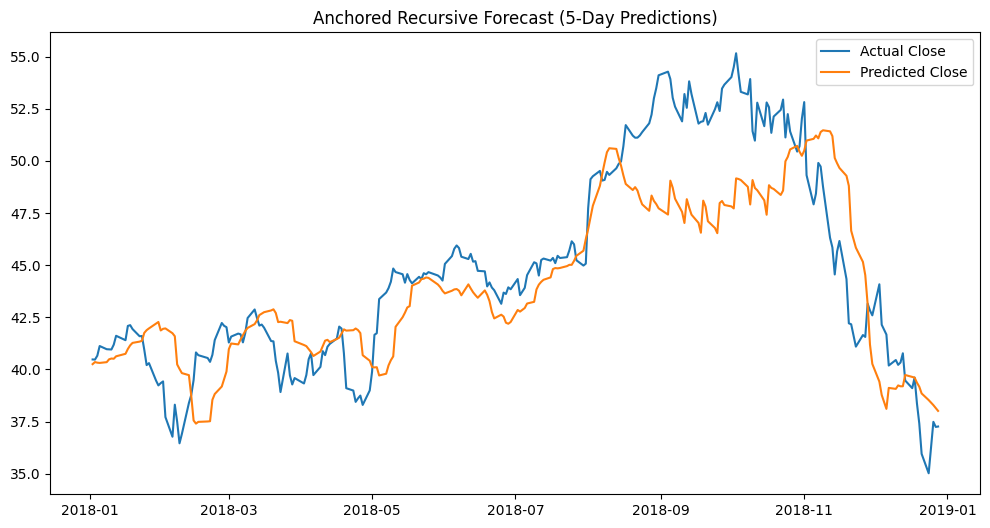

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Filter training and test data
train_df = df.loc['2012-01-01':'2017-12-31']
test_df = df.loc['2017-12-01':'2018-12-31']

features = df.columns.drop('Close')

# Step 2: Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[['Close']])

X_test = scaler_X.transform(test_df[features])
y_test = scaler_y.transform(test_df[['Close']])

# Step 3: Create sequences
def create_sequences(X, y, window=20, horizon=5):
    Xs, ys = [], []
    for i in range(len(X) - window - horizon + 1):
        Xs.append(X[i:i+window])
        ys.append(y[i+window:i+window+horizon].flatten())
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train, y_train)

model = Sequential([
    LSTM(128, input_shape=(window, X_train_seq.shape[2]), return_sequences=True),
    LSTM(64, return_sequences=False),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)

# Step 5: Recursive 5-day forecast using rolling predictions
window = 20
horizon = 5
X_test_full = X_test
dates = test_df.index

y_pred_scaled = []
y_pred_dates = []

start = 0
while start + window + horizon <= len(X_test_full):
    current_input = X_test_full[start:start+window].copy()  # Initial 20-day input

    pred_dates = dates[start + window : start + window + horizon]

    for i in range(horizon):
        date_i = pred_dates[i]
        if date_i < pd.Timestamp("2018-01-01") or date_i > pd.Timestamp("2018-12-31"):
            continue  # Skip if not in 2018
        X_input_seq = current_input[-window:].reshape(1, window, -1)

        # Predict next day (scaled Close)
        next_close_scaled = model.predict(X_input_seq, verbose=0)[0][0]
        y_pred_scaled.append([next_close_scaled])
        y_pred_dates.append(pred_dates[i])

        # Get next date's feature row from df (already computed, unscaled)
        real_next_row = df.loc[date_i, features].values.reshape(1, -1)

# Scale it
        real_next_row_scaled = scaler_X.transform(real_next_row)

# Replace Close_lag1 in scaled row with the predicted value
        real_next_row_scaled[0, features.get_loc('Close_lag1')] = next_close_scaled

# Append to current input
        current_input = np.vstack([current_input, real_next_row_scaled])


    # Snap to real values every 5 days
    start += horizon

# Convert to original scale
y_pred_scaled = np.array(y_pred_scaled).reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Match actual values
y_true = test_df.loc[y_pred_dates, 'Close']
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")
print(f"MAPE: {mape}")
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_true.index, y_true.values, label='Actual Close')
plt.plot(y_true.index, y_pred.flatten(), label='Predicted Close')
plt.legend()
plt.title('Anchored Recursive Forecast (5-Day Predictions)')
plt.show()

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - loss: 0.0317
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0041
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0027
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0026
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0028
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0034
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0021
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0021
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0023
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0022
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0028
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0021
Epoch 13/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0021
Epoch 14/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0018
Epoch 15/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.0023
E

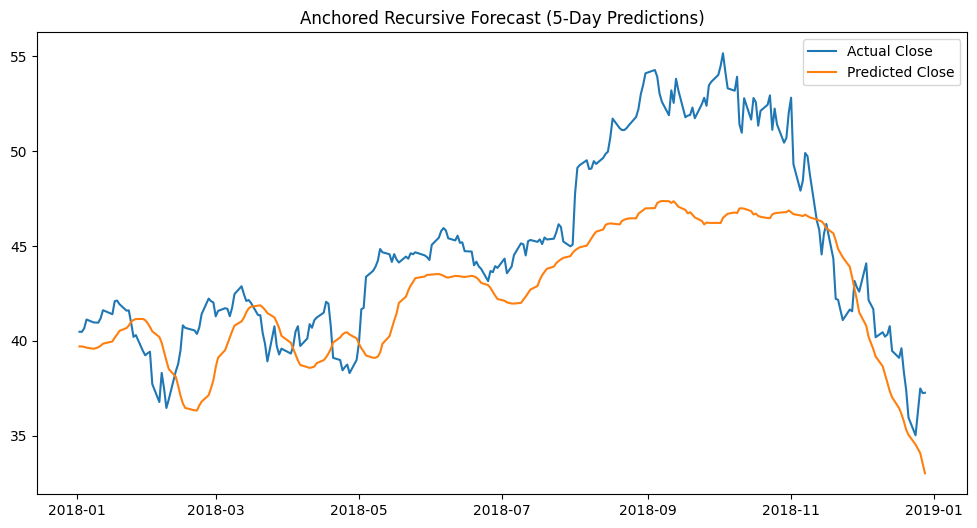

In [23]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Filter training and test data
train_df = df.loc['2012-01-01':'2017-12-31']
test_df = df.loc['2017-12-01':'2018-12-31']

features = df.columns.drop('Close')

# Step 2: Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[['Close']])

X_test = scaler_X.transform(test_df[features])
y_test = scaler_y.transform(test_df[['Close']])

# Step 3: Create sequences
def create_sequences(X, y, window=20, horizon=5):
    Xs, ys = [], []
    for i in range(len(X) - window - horizon + 1):
        Xs.append(X[i:i+window])
        ys.append(y[i+window:i+window+horizon].flatten())
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train, y_train)

# Step 4: Build the LSTM model
model = Sequential([
    LSTM(96, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=True),
    Dropout(0.2),

    LSTM(96, return_sequences=True),
    Dropout(0.2),

    LSTM(96, return_sequences=True),
    Dropout(0.2),

    LSTM(96),  # return_sequences=False by default here, output shape (None, 96)
    Dropout(0.2),

    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)

# Step 5: Recursive 5-day forecast using rolling predictions
window = 20
horizon = 5
X_test_full = X_test
dates = test_df.index

y_pred_scaled = []
y_pred_dates = []

start = 0
while start + window + horizon <= len(X_test_full):
    current_input = X_test_full[start:start+window].copy()  # Initial 20-day input

    pred_dates = dates[start + window : start + window + horizon]

    for i in range(horizon):
        date_i = pred_dates[i]
        if date_i < pd.Timestamp("2018-01-01") or date_i > pd.Timestamp("2018-12-31"):
            continue  # Skip if not in 2018
        X_input_seq = current_input[-window:].reshape(1, window, -1)

        # Predict next day (scaled Close)
        next_close_scaled = model.predict(X_input_seq, verbose=0)[0][0]
        y_pred_scaled.append([next_close_scaled])
        y_pred_dates.append(pred_dates[i])

        # Get next date's feature row from df (already computed, unscaled)
        real_next_row = df.loc[date_i, features].values.reshape(1, -1)

# Scale it
        real_next_row_scaled = scaler_X.transform(real_next_row)

# Replace Close_lag1 in scaled row with the predicted value
        real_next_row_scaled[0, features.get_loc('Close_lag1')] = next_close_scaled

# Append to current input
        current_input = np.vstack([current_input, real_next_row_scaled])


    # Snap to real values every 5 days
    start += horizon

# Convert to original scale
y_pred_scaled = np.array(y_pred_scaled).reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Match actual values
y_true = test_df.loc[y_pred_dates, 'Close']
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")
print(f"MAPE: {mape}")
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_true.index, y_true.values, label='Actual Close')
plt.plot(y_true.index, y_pred.flatten(), label='Predicted Close')
plt.legend()
plt.title('Anchored Recursive Forecast (5-Day Predictions)')
plt.show()

non recursive 5 day predictions:

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3361
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0613
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0363
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0175
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0067
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0028
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0019
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0020
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0016
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0015
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0015
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0014
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0013
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012
Epoc

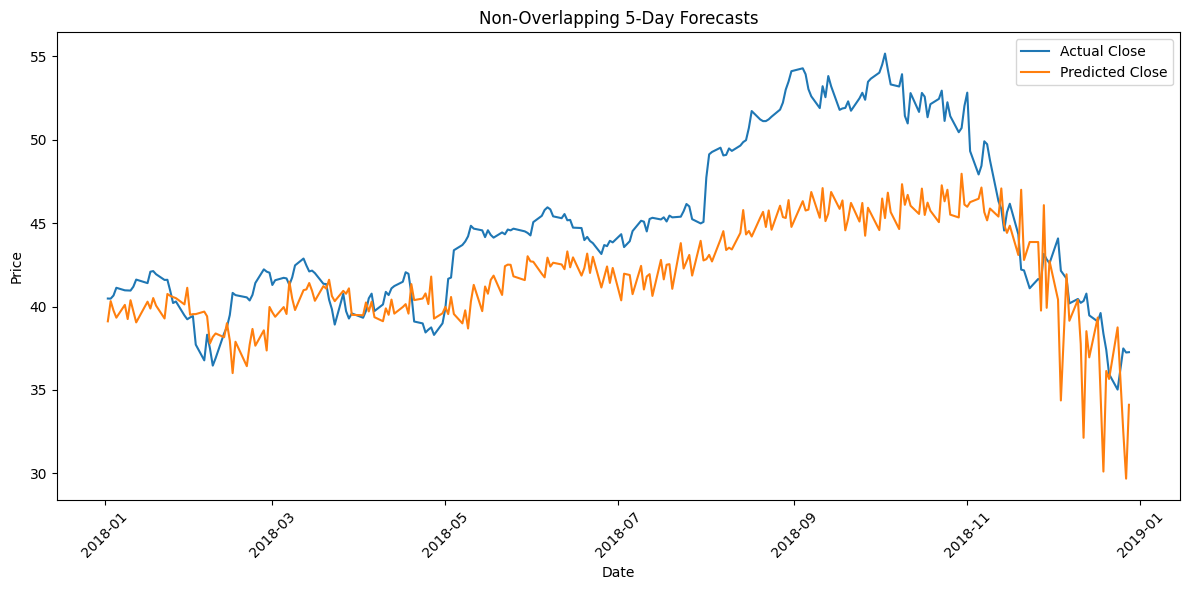

In [16]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Filter training and test data
train_df = df.loc['2012-01-01':'2017-12-31']
test_df = df.loc['2017-12-01':'2018-12-31']

features = df.columns.drop('Close')

# Step 2: Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[['Close']])

X_test = scaler_X.transform(test_df[features])
y_test = scaler_y.transform(test_df[['Close']])

# Step 3: Create non-overlapping sequences
def create_non_overlapping_sequences(X, y, window=20, horizon=5):
    Xs, ys = [], []
    i = 0
    while i + window + horizon <= len(X):
        Xs.append(X[i:i+window])
        ys.append(y[i+window:i+window+horizon].flatten())
        i += horizon  # move by 5 steps each time
    return np.array(Xs), np.array(ys)

window = 20
horizon = 5

X_train_seq, y_train_seq = create_non_overlapping_sequences(X_train, y_train, window, horizon)
X_test_seq, y_test_seq = create_non_overlapping_sequences(X_test, y_test, window, horizon)

# Step 4: Build the model
model = Sequential([
    LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dense(horizon)  # Predict 5 days
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)

# Step 5: Predict
y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled.flatten().reshape(-1, 1))
y_true = scaler_y.inverse_transform(y_test_seq.flatten().reshape(-1, 1))

# Step 6: Align dates for plotting
# Reconstruct all target dates from test_df
# Assuming window=20, horizon=5, and non-overlapping sequences

dates = test_df.index
y_pred_dates = []

i = window
while i + horizon <= len(dates):
    # Add the horizon dates for each prediction block
    y_pred_dates.extend(dates[i:i + horizon])
    i += horizon

# Now trim y_pred_dates to match the length of y_true and y_pred (flattened)
total_preds = len(y_true)  # or len(y_pred)
y_pred_dates = y_pred_dates[:total_preds]

# Step 7: Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")
print(f"MAPE: {mape}")

# Step 8: Plot
plt.figure(figsize=(12, 6))
plt.plot(y_pred_dates, y_true.flatten(), label='Actual Close')
plt.plot(y_pred_dates, y_pred.flatten(), label='Predicted Close')
plt.legend()
plt.title('Non-Overlapping 5-Day Forecasts')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1100
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0209
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0060
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0013
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0012
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 9.4197e-04
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.0942e-04
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.8148e-04
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.0973e-04
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.2021e-04
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.4363e-04
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.5112e-04
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 8.3913e-04
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 

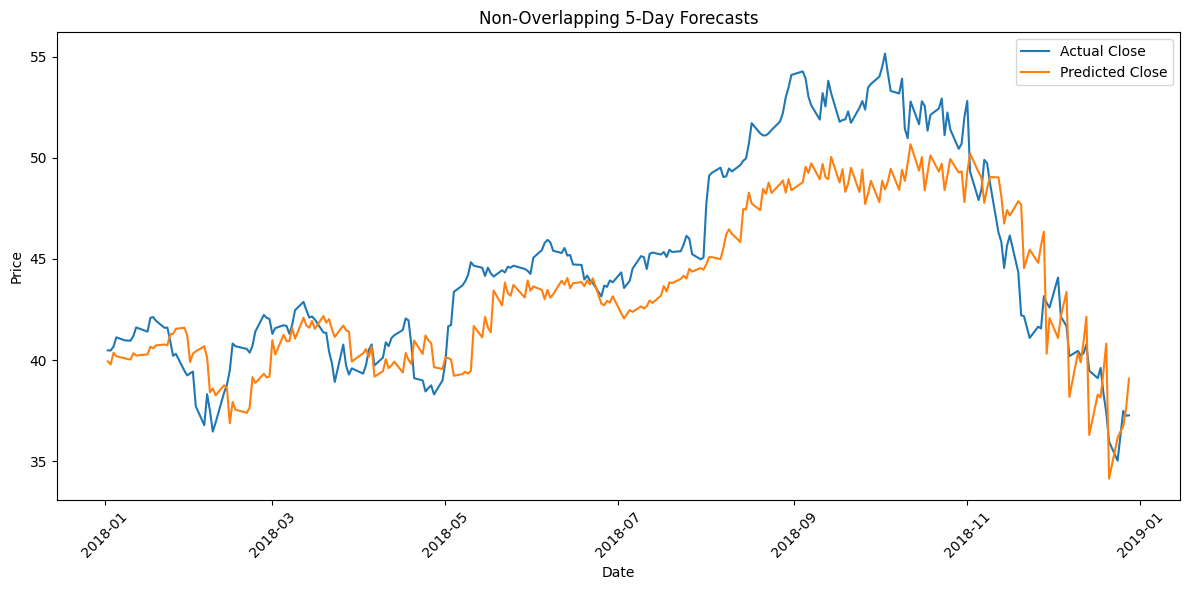

In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Filter training and test data
train_df = df.loc['2012-01-01':'2017-12-31']
test_df = df.loc['2017-12-01':'2018-12-31']

features = df.columns.drop('Close')

# Step 2: Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[['Close']])

X_test = scaler_X.transform(test_df[features])
y_test = scaler_y.transform(test_df[['Close']])

# Step 3: Create non-overlapping sequences
def create_non_overlapping_sequences(X, y, window=20, horizon=5):
    Xs, ys = [], []
    i = 0
    while i + window + horizon <= len(X):
        Xs.append(X[i:i+window])
        ys.append(y[i+window:i+window+horizon].flatten())
        i += horizon  # move by 5 steps each time
    return np.array(Xs), np.array(ys)

window = 20
horizon = 5

X_train_seq, y_train_seq = create_non_overlapping_sequences(X_train, y_train, window, horizon)
X_test_seq, y_test_seq = create_non_overlapping_sequences(X_test, y_test, window, horizon)

# Step 4: Build the model
model = Sequential([
    LSTM(128, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dense(horizon)  # Predict 5 days
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)

# Step 5: Predict
y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled.flatten().reshape(-1, 1))
y_true = scaler_y.inverse_transform(y_test_seq.flatten().reshape(-1, 1))

# Step 6: Align dates for plotting
# Reconstruct all target dates from test_df
# Assuming window=20, horizon=5, and non-overlapping sequences

dates = test_df.index
y_pred_dates = []

i = window
while i + horizon <= len(dates):
    # Add the horizon dates for each prediction block
    y_pred_dates.extend(dates[i:i + horizon])
    i += horizon

# Now trim y_pred_dates to match the length of y_true and y_pred (flattened)
total_preds = len(y_true)  # or len(y_pred)
y_pred_dates = y_pred_dates[:total_preds]

# Step 7: Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")
print(f"MAPE: {mape}")

# Step 8: Plot
plt.figure(figsize=(12, 6))
plt.plot(y_pred_dates, y_true.flatten(), label='Actual Close')
plt.plot(y_pred_dates, y_pred.flatten(), label='Predicted Close')
plt.legend()
plt.title('Non-Overlapping 5-Day Forecasts')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.1687
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0581
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0427
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0199
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0085
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0037
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0024
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0027
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0018
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0016
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0017
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0014
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0015
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0014
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0012
Epoc

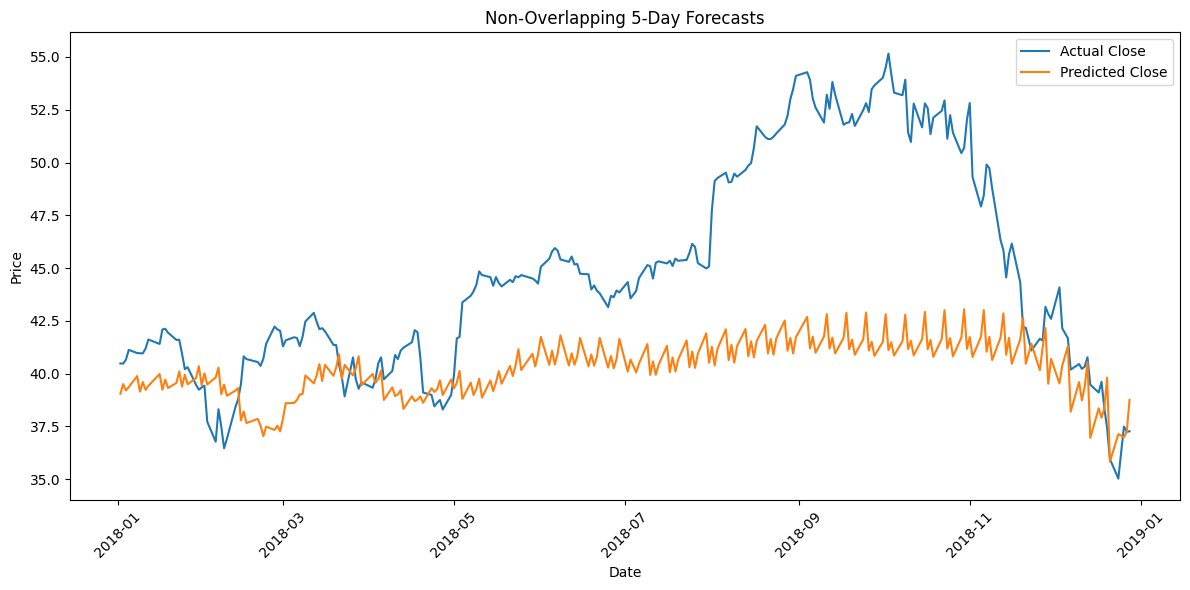

In [18]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Filter training and test data
train_df = df.loc['2012-01-01':'2017-12-31']
test_df = df.loc['2017-12-01':'2018-12-31']

features = df.columns.drop('Close')

# Step 2: Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[['Close']])

X_test = scaler_X.transform(test_df[features])
y_test = scaler_y.transform(test_df[['Close']])

# Step 3: Create non-overlapping sequences
def create_non_overlapping_sequences(X, y, window=20, horizon=5):
    Xs, ys = [], []
    i = 0
    while i + window + horizon <= len(X):
        Xs.append(X[i:i+window])
        ys.append(y[i+window:i+window+horizon].flatten())
        i += horizon  # move by 5 steps each time
    return np.array(Xs), np.array(ys)

window = 20
horizon = 5

X_train_seq, y_train_seq = create_non_overlapping_sequences(X_train, y_train, window, horizon)
X_test_seq, y_test_seq = create_non_overlapping_sequences(X_test, y_test, window, horizon)

# Step 4: Build the model
model = Sequential([
    LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=True),
    LSTM(32, return_sequences=True),
    LSTM(16),
    Dense(horizon)  # Predict 5 days
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)

# Step 5: Predict
y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled.flatten().reshape(-1, 1))
y_true = scaler_y.inverse_transform(y_test_seq.flatten().reshape(-1, 1))

# Step 6: Align dates for plotting
# Reconstruct all target dates from test_df
# Assuming window=20, horizon=5, and non-overlapping sequences

dates = test_df.index
y_pred_dates = []

i = window
while i + horizon <= len(dates):
    # Add the horizon dates for each prediction block
    y_pred_dates.extend(dates[i:i + horizon])
    i += horizon

# Now trim y_pred_dates to match the length of y_true and y_pred (flattened)
total_preds = len(y_true)  # or len(y_pred)
y_pred_dates = y_pred_dates[:total_preds]

# Step 7: Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")
print(f"MAPE: {mape}")

# Step 8: Plot
plt.figure(figsize=(12, 6))
plt.plot(y_pred_dates, y_true.flatten(), label='Actual Close')
plt.plot(y_pred_dates, y_pred.flatten(), label='Predicted Close')
plt.legend()
plt.title('Non-Overlapping 5-Day Forecasts')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1139
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0400
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0227
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0158
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0108
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0080
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0076
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0086
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0107
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0113
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0095
Epoc

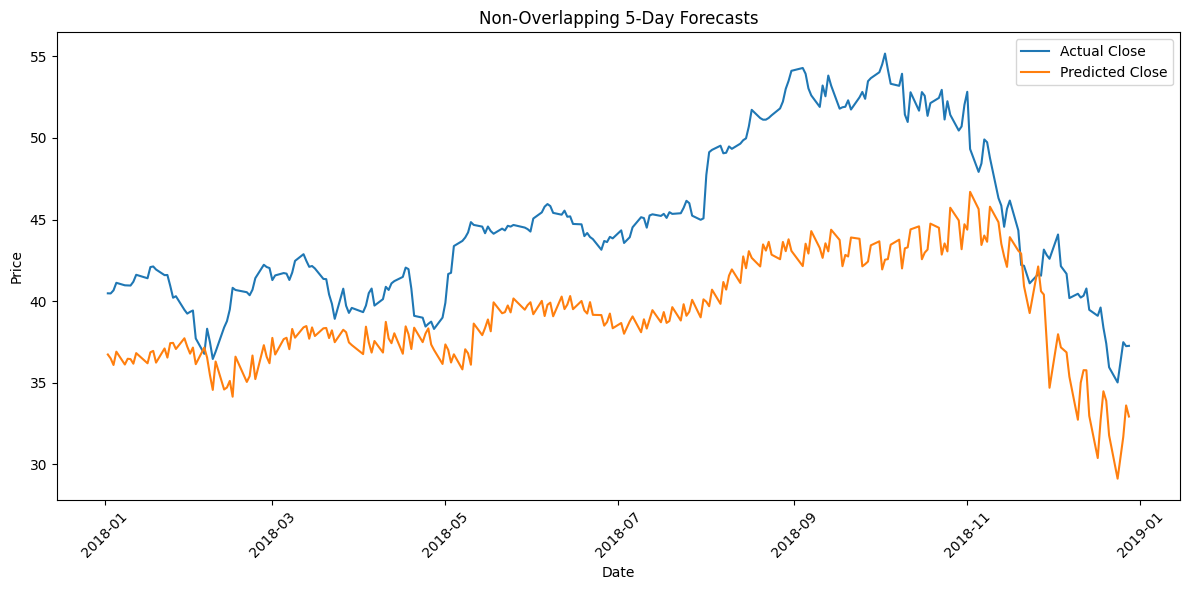

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Filter training and test data
train_df = df.loc['2012-01-01':'2017-12-31']
test_df = df.loc['2017-12-01':'2018-12-31']

features = df.columns.drop('Close')

# Step 2: Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[['Close']])

X_test = scaler_X.transform(test_df[features])
y_test = scaler_y.transform(test_df[['Close']])

# Step 3: Create non-overlapping sequences
def create_non_overlapping_sequences(X, y, window=20, horizon=5):
    Xs, ys = [], []
    i = 0
    while i + window + horizon <= len(X):
        Xs.append(X[i:i+window])
        ys.append(y[i+window:i+window+horizon].flatten())
        i += horizon  # move by 5 steps each time
    return np.array(Xs), np.array(ys)

window = 20
horizon = 5

X_train_seq, y_train_seq = create_non_overlapping_sequences(X_train, y_train, window, horizon)
X_test_seq, y_test_seq = create_non_overlapping_sequences(X_test, y_test, window, horizon)

# Step 4: Build the model
model = Sequential([
    LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), dropout=0.1),
    Dense(horizon)  # Predict 5 days
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)

# Step 5: Predict
y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled.flatten().reshape(-1, 1))
y_true = scaler_y.inverse_transform(y_test_seq.flatten().reshape(-1, 1))

# Step 6: Align dates for plotting
# Reconstruct all target dates from test_df
# Assuming window=20, horizon=5, and non-overlapping sequences

dates = test_df.index
y_pred_dates = []

i = window
while i + horizon <= len(dates):
    # Add the horizon dates for each prediction block
    y_pred_dates.extend(dates[i:i + horizon])
    i += horizon

# Now trim y_pred_dates to match the length of y_true and y_pred (flattened)
total_preds = len(y_true)  # or len(y_pred)
y_pred_dates = y_pred_dates[:total_preds]

# Step 7: Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")
print(f"MAPE: {mape}")

# Step 8: Plot
plt.figure(figsize=(12, 6))
plt.plot(y_pred_dates, y_true.flatten(), label='Actual Close')
plt.plot(y_pred_dates, y_pred.flatten(), label='Predicted Close')
plt.legend()
plt.title('Non-Overlapping 5-Day Forecasts')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - loss: 0.1261
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0490
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0117
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0090
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0070
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0057
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0055
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0052
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0047
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0046
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0042
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0040
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0042
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0043
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0051


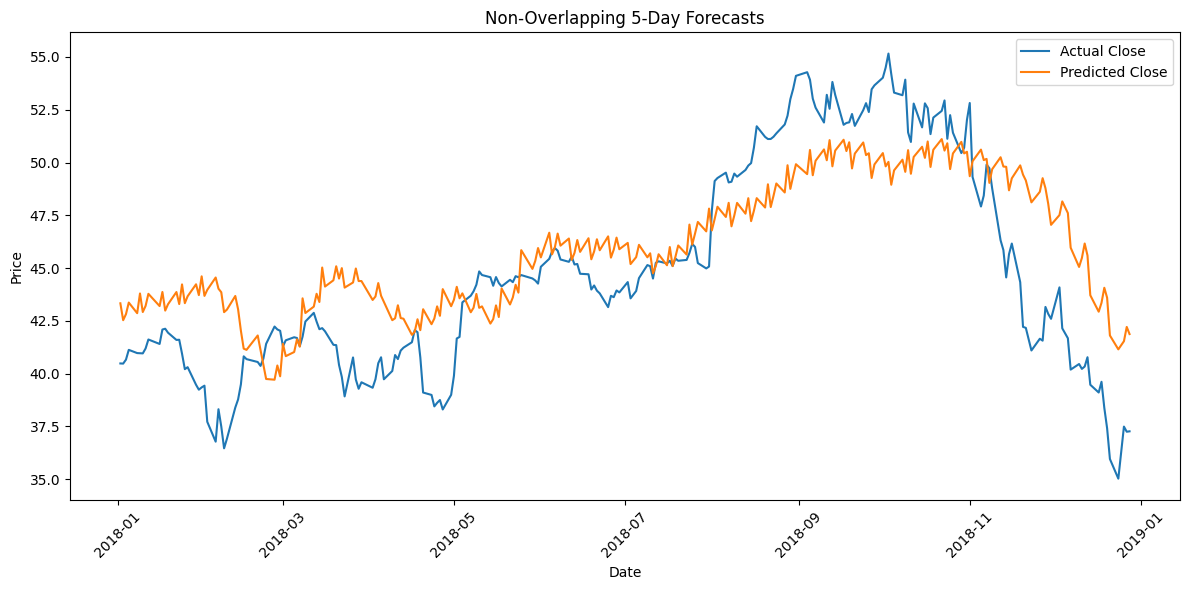

In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Filter training and test data
train_df = df.loc['2012-01-01':'2017-12-31']
test_df = df.loc['2017-12-01':'2018-12-31']

features = df.columns.drop('Close')

# Step 2: Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[['Close']])

X_test = scaler_X.transform(test_df[features])
y_test = scaler_y.transform(test_df[['Close']])

# Step 3: Create non-overlapping sequences
def create_non_overlapping_sequences(X, y, window=20, horizon=5):
    Xs, ys = [], []
    i = 0
    while i + window + horizon <= len(X):
        Xs.append(X[i:i+window])
        ys.append(y[i+window:i+window+horizon].flatten())
        i += horizon  # move by 5 steps each time
    return np.array(Xs), np.array(ys)

window = 20
horizon = 5

X_train_seq, y_train_seq = create_non_overlapping_sequences(X_train, y_train, window, horizon)
X_test_seq, y_test_seq = create_non_overlapping_sequences(X_test, y_test, window, horizon)

# Step 4: Build the model
model = Sequential([
    LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=True),
    Dropout(0.2),

    LSTM(96, return_sequences=True),
    Dropout(0.2),

    LSTM(96, return_sequences=True),
    Dropout(0.2),

    LSTM(96),  # return_sequences=False by default here, output shape (None, 96)
    Dropout(0.2),

    Dense(5)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)

# Step 5: Predict
y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled.flatten().reshape(-1, 1))
y_true = scaler_y.inverse_transform(y_test_seq.flatten().reshape(-1, 1))

# Step 6: Align dates for plotting
# Reconstruct all target dates from test_df
# Assuming window=20, horizon=5, and non-overlapping sequences

dates = test_df.index
y_pred_dates = []

i = window
while i + horizon <= len(dates):
    # Add the horizon dates for each prediction block
    y_pred_dates.extend(dates[i:i + horizon])
    i += horizon

# Now trim y_pred_dates to match the length of y_true and y_pred (flattened)
total_preds = len(y_true)  # or len(y_pred)
y_pred_dates = y_pred_dates[:total_preds]

# Step 7: Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")
print(f"MAPE: {mape}")

# Step 8: Plot
plt.figure(figsize=(12, 6))
plt.plot(y_pred_dates, y_true.flatten(), label='Actual Close')
plt.plot(y_pred_dates, y_pred.flatten(), label='Predicted Close')
plt.legend()
plt.title('Non-Overlapping 5-Day Forecasts')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()